In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from spextractor import Spextractor
import pandas as pd
import numpy as np
from astropy.table import Table
import pandas as pd
from astropy.io import ascii
import glob

In [7]:
###### read spectrum 
spectra=glob.glob('spectra/SN2023vjh/*')
spectra.sort()
i=1
z=0.019
spectra

['spectra/SN2023vjh/SN2023vjh_20231023_GTC.txt',
 'spectra/SN2023vjh/SN2023vjh_20231101_NOT.txt',
 'spectra/SN2023vjh/SN2023vjh_20231103_Gr11_NTT.txt',
 'spectra/SN2023vjh/SN2023vjh_20231103_Gr16_NTT.txt',
 'spectra/SN2023vjh/SN2023vjh_20231103_LT.txt',
 'spectra/SN2023vjh/SN2023vjh_20231104_GTC.txt',
 'spectra/SN2023vjh/SN2023vjh_20231110_GTC.txt',
 'spectra/SN2023vjh/SN2023vjh_20231116_NTT.txt',
 'spectra/SN2023vjh/SN2023vjh_20231117_NTT.txt',
 'spectra/SN2023vjh/SN2023vjh_20231123_GTC.txt']

In [8]:
# Name of the supernova
string = spectra[i]
SName=string.split('/')[-1].split('.')[0]
print(SName)

SN2023vjh_20231101_NOT


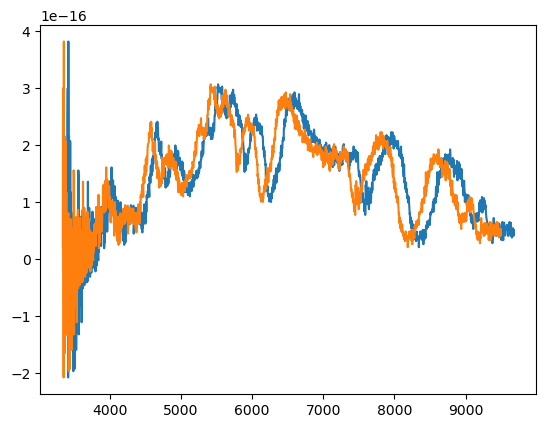

In [9]:
# spetra to a numpy array
tab = pd.read_csv(spectra[i], comment='#',header=1,delim_whitespace=True,names=('x','f'))#,dtype={'x': np.float64, 'f': np.float64, 'e': np.float64})
#if type(tab['e'])== None:tab['e']=tab['f']*0.01 + 1.25*np.std(tab['f'])
tab2=tab.to_numpy()
tab2

plt.plot(tab['x'],tab['f'],label='Observed')
plt.plot(tab['x']/(1.0+z),tab['f'],label='Rest Frame')
plt.show()

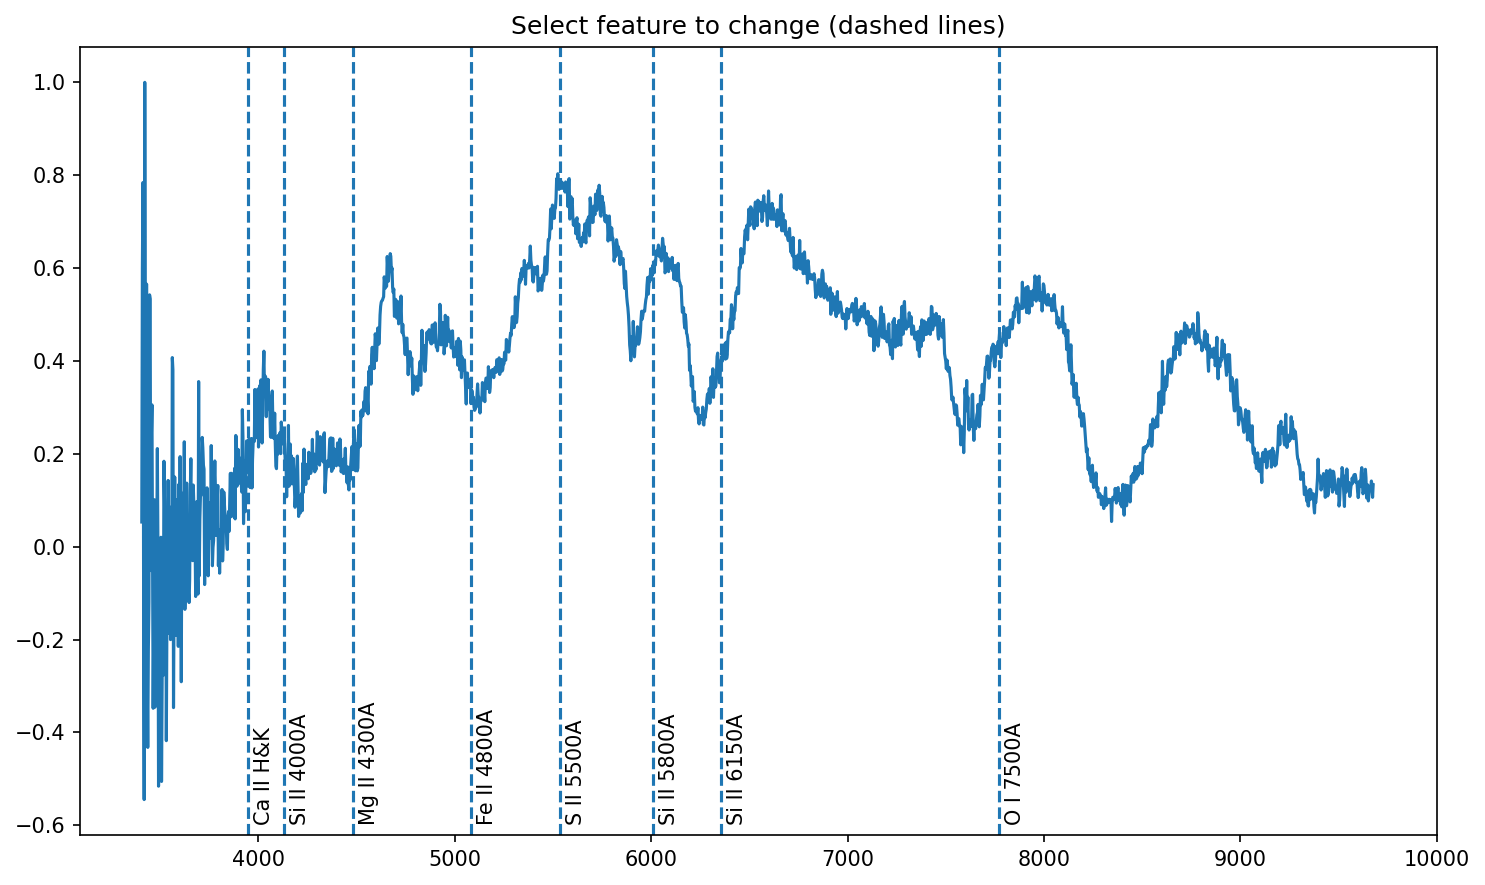

In [10]:
sn_type='Ia'
z=None
spex = Spextractor(tab2, sn_type,z=z, manual_range=True, remove_telluric=False, plot=True)

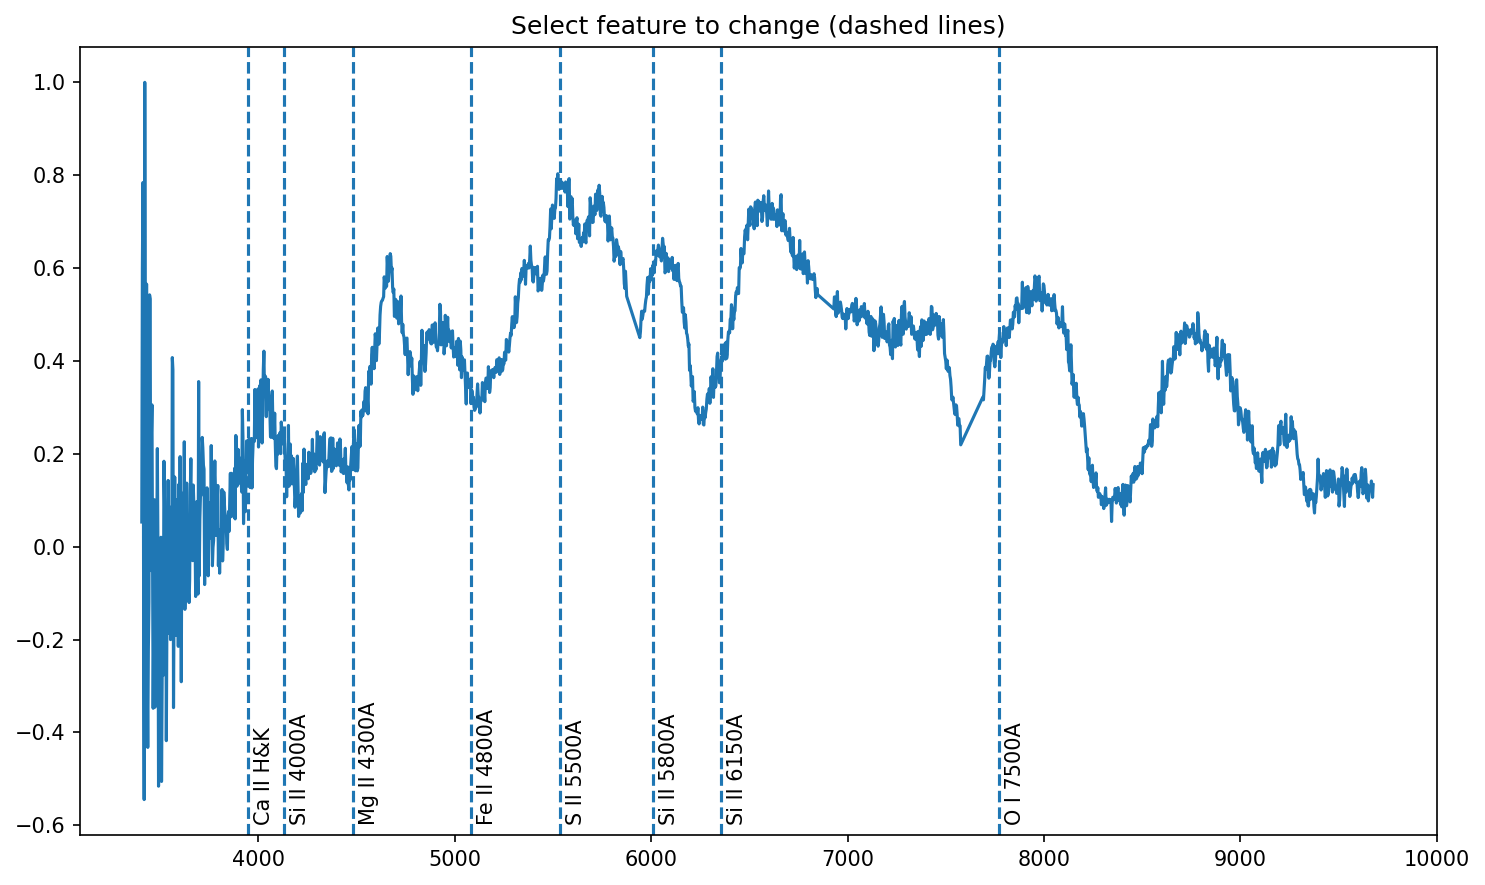

In [11]:
spex = Spextractor(tab2, sn_type,z=z, manual_range=True, remove_telluric=True, plot=True)

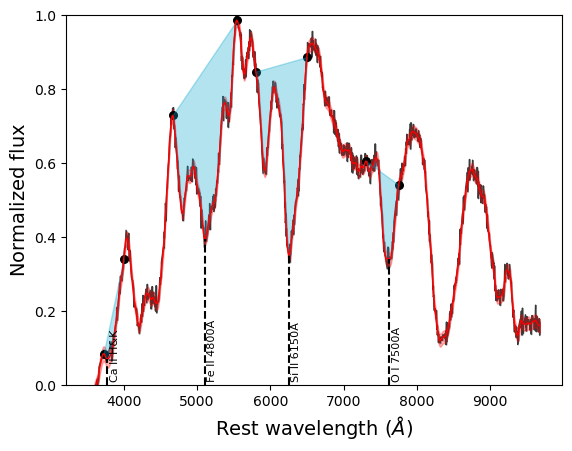

In [38]:
spex.create_model(downsampling=1.0,sigma_outliers=3.0,model_uncertainty=True,optimize_noise=False)
spex.process()

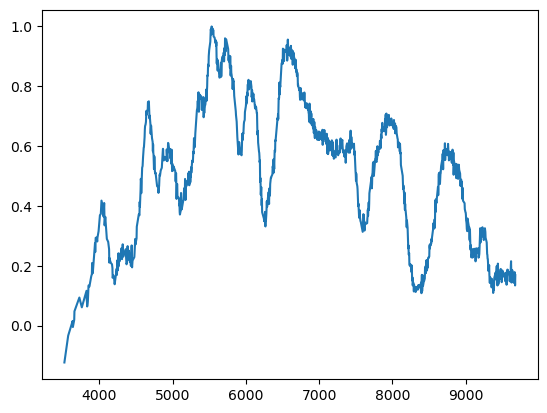

In [39]:
x= spex.data[:,0]
y= spex.data[:,1]
plt.plot(x,y,label='Rest Frame')
plt.show()

In [7]:
#### SN Type Ia #####

# CA II H&K

ca = 'Ca II H&K'
vca = spex.vel[ca]
vca_err = spex.vel_err[ca]
print(f'vca = {vca:.3f} +- {vca_err:.3f}')

pca = spex.pew[ca]
pca_err = spex.pew_err[ca]
print(f'pca = {pca:.3f} +- {pca_err:.3f}')

try: 
    dca = spex.depth[ca][0]
except:
    dca = np.nan
    
try: 
    dca_err = spex.depth_err[ca][0]
except:
    dca_err = np.nan
    
print(f'dca = {dca:.3f} +- {dca_err:.3f}')

# SI II 4000A

si4 = 'Si II 4000A'
vsi4 = spex.vel[si4]
vsi4_err = spex.vel_err[si4]
print(f'vsi4 = {vsi4:.3f} +- {vsi4_err:.3f}')

psi4 = spex.pew[si4]
psi4_err = spex.pew_err[si4]
print(f'psi4 = {psi4:.3f} +- {psi4_err:.3f}')

try:
    dsi4 = spex.depth[si4][0]
except: 
    dsi4 = np.nan

try: 
    dsi4_err = spex.depth_err[si4][0]
except:
    dsi4_err = np.nan
    
print(f'dsi4 = {dsi4:.3f} +- {dsi4_err:.3f}')

# MG II 4300A

mg = 'Mg II 4300A'
vmg = spex.vel[mg]
vmg_err = spex.vel_err[mg]
print(f'vmg = {vmg:.3f} +- {vmg_err:.3f}')

pmg = spex.pew[mg]
pmg_err = spex.pew_err[mg]
print(f'pmg = {pmg:.3f} +- {pmg_err:.3f}')

try: 
    dmg = spex.depth[mg][0]
except:
    dmg = np.nan
    
try: 
    dmg_err = spex.depth_err[mg][0]
except:
    dmg_err = np.nan
    
print(f'dmg = {dmg:.3f} +- {dmg_err:.3f}')

# FE II 4800A

fe = 'Fe II 4800A'
vfe = spex.vel[fe]
vfe_err = spex.vel_err[fe]
print(f'vfe = {vfe:.3f} +- {vfe_err:.3f}')

pfe = spex.pew[fe]
pfe_err = spex.pew_err[fe]
print(f'pfe = {pfe:.3f} +- {pfe_err:.3f}')

try: 
    dfe = spex.depth[fe][0]
except:
    dfe = np.nan
    
try: 
    dfe_err = spex.depth_err[fe][0]
except:
    dfe_err = np.nan
    
print(f'dfe = {dfe:.3f} +- {dfe_err:.3f}')

# S II 5500A

s = 'S II 5500A'
vs = spex.vel[s]
vs_err = spex.vel_err[s]
print(f'vs = {vs:.3f} +- {vs_err:.3f}')

ps = spex.pew[s]
ps_err = spex.pew_err[s]
print(f'ps = {ps:.3f} +- {ps_err:.3f}')

try: 
    ds = spex.depth[s][0]
except:
    ds = np.nan
    
try: 
    ds_err = spex.depth_err[s][0]
except:
    ds_err = np.nan

print(f'ds = {ds:.3f} +- {ds_err:.3f}')

# SI II 5800A

si5 = 'Si II 5800A'
vsi5 = spex.vel[si5]
vsi5_err = spex.vel_err[si5]
print(f'vsi = {vsi5:.3f} +- {vsi5_err:.3f}')

psi5 = spex.pew[si5]
psi5_err = spex.pew_err[si5]
print(f'psi5 = {psi5:.3f} +- {psi5_err:.3f}')

try: 
    dsi5 = spex.depth[si5][0]
except:
    dsi5 = np.nan
    
try: 
    dsi5_err = spex.depth_err[si5][0]
except:
    dsi5_err = np.nan

print(f'dsi5 = {dsi5:.3f} +- {dsi5_err:.3f}')

# SI II 6150A

si = 'Si II 6150A'
vsi = spex.vel[si]
vsi_err = spex.vel_err[si]
print(f'vsi = {vsi:.3f} +- {vsi_err:.3f}')

psi = spex.pew[si]
psi_err = spex.pew_err[si]
print(f'psi = {psi:.3f} +- {psi_err:.3f}')

try: 
    dsi = spex.depth[si][0]
except:
    dsi = np.nan
    
try: 
    dsi_err = spex.depth_err[si][0]
except:
    dsi_err = np.nan

print(f'dsi = {dsi:.3f} +- {dsi_err:.3f}')


# O I 7500A

o = 'O I 7500A'
vo = spex.vel[o]
vo_err = spex.vel_err[o]
print(f'vo = {vo:.3f} +- {vo_err:.3f}')

po = spex.pew[o]
po_err = spex.pew_err[o]
print(f'po = {po:.3f} +- {po_err:.3f}')

try: 
    do = spex.depth[o][0]
except:
    do = np.nan
    
try: 
    do_err = spex.depth_err[o][0]
except:
    do_err = np.nan
    
print(f'do = {do:.3f} +- {do_err:.3f}')


# Ca II IR

caIR = 'Ca II 8542A'
vcaIR = spex.vel[caIR]
vcaIR_err = spex.vel_err[caIR]
print(f'vcaIR = {vcaIR:.3f} +- {vcaIR_err:.3f}')

pcaIR = spex.pew[caIR]
pcaIR_err = spex.pew_err[caIR]
print(f'pcaIR = {pcaIR:.3f} +- {pcaIR_err:.3f}')

try: 
    dcaIR = spex.depth[caIR][0]
except:
    dcaIR = np.nan
    
try: 
    dcaIR_err = spex.depth_err[caIR][0]
except:
    dcaIR_err = np.nan
    
print(f'dcaIR = {dcaIR:.3f} +- {dcaIR_err:.3f}')


vca = 9.359 +- 0.167
pca = 119.565 +- 2.705
dca = 0.283 +- 0.009
vsi4 = nan +- nan
psi4 = 0.000 +- 0.000
dsi4 = nan +- nan
vmg = 19.640 +- 0.198
pmg = 279.930 +- 5.411
dmg = 0.476 +- 0.009
vfe = 0.864 +- 0.476
pfe = 206.811 +- 6.436
dfe = 0.415 +- 0.009
vs = 8.115 +- 0.356
ps = 11.954 +- 5.376
ds = 0.072 +- 0.009
vsi = 5.962 +- 0.834
psi5 = 47.336 +- 5.385
dsi5 = 0.292 +- 0.009
vsi = 6.731 +- 0.220
psi = 99.882 +- 4.977
dsi = 0.419 +- 0.009
vo = 6.406 +- 0.029
po = 116.987 +- 3.238
do = 0.323 +- 0.009
vcaIR = 9.057 +- 0.335
pcaIR = 317.988 +- 3.132
dcaIR = 0.408 +- 0.009


In [8]:
#Create plot 
fig, ax = spex.plot


# Nom de la supernova
string = spectra[i]
SName=string.split('/')[-1].split('.')[0]

print(SName)

ax.set_title(SName)

plt.tight_layout()
fig.savefig('images/SN2023vjh/'+SName, dpi=300)

plt.close('all')

SN2023vjh_20231023_GTC


In [9]:
from tabulate import tabulate

datav = [['%.3f +- %.3f'%(vca,vca_err), '%.3f +- %.3f'%(vsi4, vsi4_err), '%.3f +- %.3f'%(vmg, vmg_err), '%.3f +- %.3f'%(vfe, vfe_err), '%.3f +- %.3f'%(vs, vs_err), '%.3f +- %.3f'%(vsi5, vsi5_err), '%.3f +- %.3f'%(vsi, vsi_err), '%.3f +- %.3f'%(vo, vo_err), '%.3f +- %.3f'%(vcaIR, vcaIR_err)]]
print (tabulate(datav, headers=["Ca II H&K", "Si II 4000A", "Mg II 4300A", "Fe II 4800A", "S II 5500A", "Si II 5800A", "Si II 6150A","O I 7500A","Ca II 8542A"]))

datap = [['%.3f +- %.3f'%(pca, pca_err), '%.3f +- %.3f'%(psi4,psi4_err), '%.3f +- %.3f'%(pmg, pmg_err), '%.3f +- %.3f'%(pfe, pfe_err), '%.3f +- %.3f'%(ps, ps_err), '%.3f +- %.3f'%(psi5,psi5_err), '%.3f +- %.3f'%(psi,psi_err),'%.3f +- %.3f'%(po,po_err),'%.3f +- %.3f'%(pcaIR,pcaIR_err)]]
print (tabulate(datap, headers=["Ca II H&K", "Si II 4000A", "Mg II 4300A", "Fe II 4800A", "S II 5500A", "Si II 5800A", "Si II 6150A","O I 7500A","Ca II 8542A"]))

datad = [['%.3f +- %.3f'%(dca, dca_err), '%.3f +- %.3f'%(dsi4, dsi4_err), '%.3f +- %.3f'%(dmg, dmg_err), '%.3f +- %.3f'%(dfe, dfe_err), '%.3f +- %.3f'%(ds, ds_err), '%.3f +- %.3f'%(dsi5,dsi5_err), '%.3f +- %.3f'%(dsi,dsi_err),'%.3f +- %.3f'%(do,do_err),'%.3f +- %.3f'%(dcaIR,dcaIR_err)]]
print (tabulate(datad, headers=["Ca II H&K", "Si II 4000A", "Mg II 4300A", "Fe II 4800A", "S II 5500A", "Si II 5800A", "Si II 6150A","O I 7500A","Ca II 8542A"]))

Ca II H&K       Si II 4000A    Mg II 4300A      Fe II 4800A     S II 5500A      Si II 5800A     Si II 6150A     O I 7500A       Ca II 8542A
--------------  -------------  ---------------  --------------  --------------  --------------  --------------  --------------  --------------
9.359 +- 0.167  nan +- nan     19.640 +- 0.198  0.864 +- 0.476  8.115 +- 0.356  5.962 +- 0.834  6.731 +- 0.220  6.406 +- 0.029  9.057 +- 0.335
Ca II H&K         Si II 4000A     Mg II 4300A       Fe II 4800A       S II 5500A       Si II 5800A      Si II 6150A      O I 7500A         Ca II 8542A
----------------  --------------  ----------------  ----------------  ---------------  ---------------  ---------------  ----------------  ----------------
119.565 +- 2.705  0.000 +- 0.000  279.930 +- 5.411  206.811 +- 6.436  11.954 +- 5.376  47.336 +- 5.385  99.882 +- 4.977  116.987 +- 3.238  317.988 +- 3.132
Ca II H&K       Si II 4000A    Mg II 4300A     Fe II 4800A     S II 5500A      Si II 5800A     Si II 6150A     

In [12]:
f = open('results/Results_SN2023vjh.txt', 'a')
f.write('%10s %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f \n'%(SName, vca, vca_err, pca, pca_err, dca, dca_err, vsi4, vsi4_err, psi4, psi4_err, dsi4, dsi4_err, vmg, vmg_err, pmg, pmg_err, dmg, dmg_err, vfe, vfe_err, pfe, pfe_err, dfe, dfe_err, vs, vs_err, ps, ps_err, ds, ds_err, vsi5, vsi5_err, psi5, psi5_err, dsi5, dsi5_err, vsi, vsi_err, psi, psi_err, dsi, dsi_err))
f.close()


In [ ]:
#f = open(spectra[i], 'r')
#
##redshift
#for line in f:
#    if len(line.split()) >1:
#        
#        if line.split()[0] == 'TRANSIENT_NAME:': T=line.split()[1]
#        if line.split()[0] == 'OBS_DATE:':       D=line.split()[1]
#        if line.split()[0] == 'MJD:':            M=line.split()[1]
#        if line.split()[0] == 'MJD_MAX:':        M_MAX=line.split()
#        if line.split()[0] == 'SPEC_EVAL:':      S=line.split()[1]
#        if line.split()[0] == 'TELESCOPE:':      TE=line.split()[1]
#        if line.split()[0] == 'PHASE:':          P=line.split()[1]
#        if line.split()[0] == 'REDSHIFT:':       z=float(line.split()[1])
#            
#
#
#arr =(SName, M, M_MAX, S, TE, P, z)
#print(arr)
#
#f.close()

In [13]:
#f = open('results/DES3fys.txt', 'a')
#f.write('%10s %10s %10s %10s %10s %10s %10s \n'%(SName, M, M_MAX, S, TE, P, z))
#f.close()